In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [6]:
df_fake = pd.read_csv("Fake.csv")
df_true= pd.read_csv("True.csv")

In [7]:
df_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
df_fake["class"] = 0 #insering a column
df_true["class"] = 1

In [10]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [12]:
df_fake.isnull().sum() #checking null values

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [14]:

df_fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [15]:
df_true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [17]:
import nltk
nltk.download('all')

[nltk_data] Error loading all: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

Text(0, 0.5, 'Proportion of News Articles')

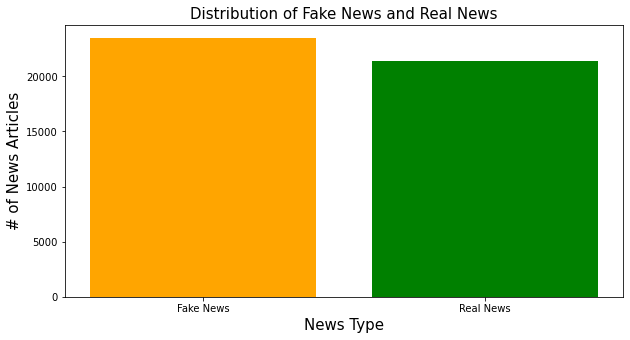

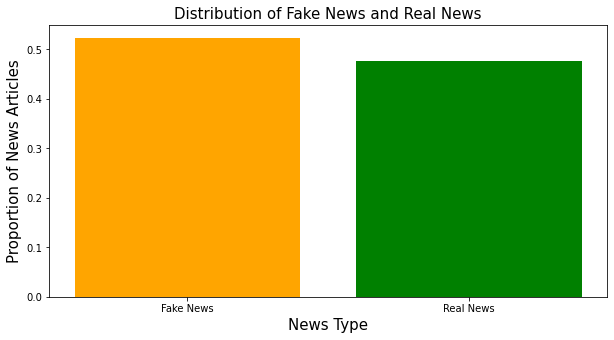

In [22]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df_fake), color='orange')
plt.bar('Real News', len(df_true), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)


total_len = len(df_fake) + len(df_true)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df_fake) / total_len, color='orange')
plt.bar('Real News', len(df_true) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)

In [25]:
print('Difference in news articles:',len(df_fake)-len(df_true))

Difference in news articles: 2064


In [26]:
news_df = pd.concat([df_fake,df_true], ignore_index=True, sort=False)
news_df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [27]:
news_df['text'] = news_df['title'] + news_df['text']
news_df.drop('title', axis=1, inplace=True)


In [28]:
features = news_df['text']
targets = news_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [29]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

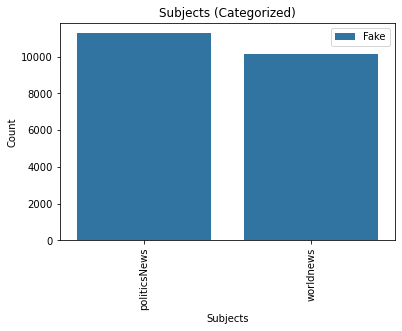

In [37]:
sns.countplot(x="subject",
              hue="class",
              data=df_true)

plt.title("Subjects (Categorized)")
plt.xlabel("Subjects")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(["Fake", "Real"], loc="best")
plt.show()

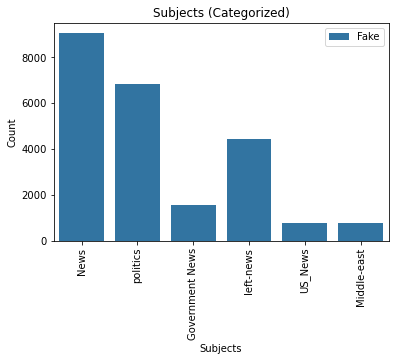

In [38]:
sns.countplot(x="subject",
              hue="class",
              data=df_fake)

plt.title("Subjects (Categorized)")
plt.xlabel("Subjects")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(["Fake", "Real"], loc="best")
plt.show()

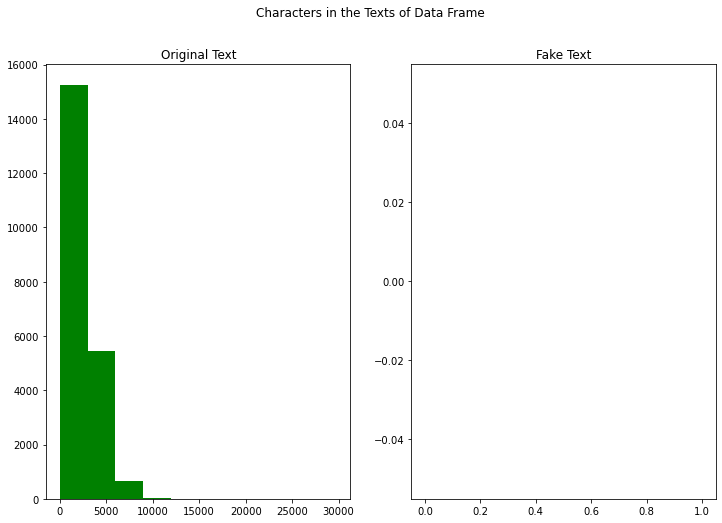

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len = df_true[df_true["class"] == 1]["text"].str.len()
ax1.hist(text_len, color='green')
ax1.set_title('Original Text')

text_len = df_true[df_true["class"] == 0]["text"].str.len()
ax2.hist(text_len, color="red")
ax2.set_title("Fake Text")

fig.suptitle("Characters in the Texts of Data Frame")
plt.show()


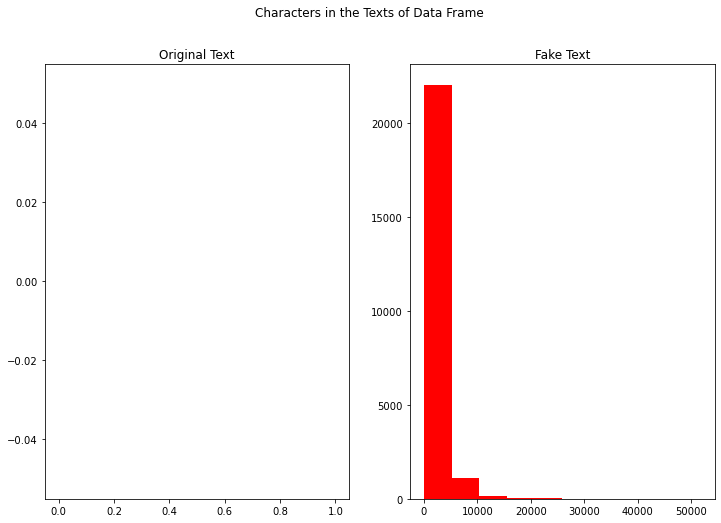

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len = df_fake[df_fake["class"] == 1]["text"].str.len()
ax1.hist(text_len, color='green')
ax1.set_title('Original Text')

text_len = df_fake[df_fake["class"] == 0]["text"].str.len()
ax2.hist(text_len, color="red")
ax2.set_title("Fake Text")

fig.suptitle("Characters in the Texts of Data Frame")
plt.show()


In [47]:
df = df_true.drop(["title", "subject","date"], axis = 1)
df.isnull().sum()
df = df_fake.drop(["title", "subject","date"], axis = 1)
df.isnull().sum()

text     0
class    0
dtype: int64

In [48]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [49]:
df["text"] = df["text"].apply(wordopt)

In [50]:
x = df["text"] #defining dependent and independent variable
y = df["class"]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) #spliting the dataset

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
                                                              #converting text to vectors
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [54]:
xv_train.shape,y_train.shape

((17610, 73181), (17610,))

In [59]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [60]:
xv_train.shape,y_train.shape

((17610, 73181), (17610,))

In [61]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

1.0

In [62]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871

    accuracy                           1.00      5871
   macro avg       1.00      1.00      1.00      5871
weighted avg       1.00      1.00      1.00      5871



In [63]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
xv_train.shape,y_train.shape
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

1.0

In [65]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871

    accuracy                           1.00      5871
   macro avg       1.00      1.00      1.00      5871
weighted avg       1.00      1.00      1.00      5871

